Implementation an adaptation of blog post:  Srikar.  ["Python Implementation of Andrew Ng's Machine Learning Course (Part 1)."](https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-1-6b8dd1c73d80) Analytics Vidhya.  31 August, 2018.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
PATH = Path.home() / "Code/cipher813/coursera_ng_machine_learning/machine-learning-ex1/"

In [3]:
PATH

PosixPath('/Users/bmcmahon/Code/cipher813/coursera_ng_machine_learning/machine-learning-ex1')

### Univariate Linear Regression

In [4]:
data = pd.read_csv(PATH / "ex1/ex1data1.txt", names=['population','profit'])

X = data.iloc[:,0]  # population
y = data.iloc[:,1]  # profit

m = len(y)  # number of training examples
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
def plot_scatter1(X, y):
    plt.scatter(X, y)
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()

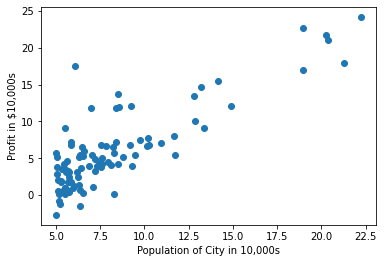

In [6]:
plot_scatter1(X,y)

In [7]:
# plt.scatter(X, y)
# plt.xlabel("Population of City in 10,000s")
# plt.ylabel("Profit in $10,000s")
# plt.show()

In [8]:
# converts rank1 to rank2 arrays
X = X[:,np.newaxis] 
y = y[:,np.newaxis]

In [9]:
theta = np.zeros([2,1])
iterations = 15000
alpha = 0.001
ones = np.ones((m,1))
X = np.hstack((ones, X))  # adds intercept term

In [10]:
def compute_cost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp,2)) / (2*m)

J = compute_cost(X, y, theta)
J

32.072733877455676

In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

theta = gradient_descent(X, y, theta, alpha, iterations)
theta

array([[-3.62970773],
       [ 1.16630371]])

In [12]:
J = compute_cost(X, y, theta)
J

4.483416504288282

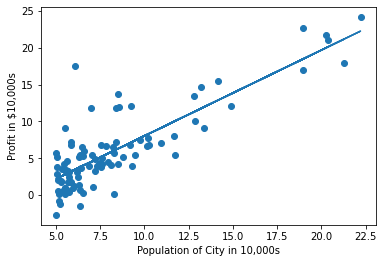

In [13]:
plt.scatter(X[:,1], y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(X[:,1],np.dot(X, theta))
plt.show()

### Multivariate Linear Regression

In [14]:
data2 = pd.read_csv(PATH / "ex1/ex1data2.txt",names=['size','bedrooms','price'])
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
def feature_scale(dataframe, column):
    return (dataframe[column] - dataframe[column].mean()) / np.std(dataframe[column])

In [16]:
data2['size_scaled'] = feature_scale(data2,'size')
data2['bedrooms_scaled'] = feature_scale(data2,'bedrooms')
data2.head()

,size,bedrooms,price,size_scaled,bedrooms_scaled
0,2104,3,399900,0.131415,-0.226093
1,1600,3,329900,-0.509641,-0.226093
2,2400,3,369000,0.507909,-0.226093
3,1416,2,232000,-0.743677,-1.554392
4,3000,4,539900,1.271071,1.102205


In [17]:
X = data2.loc[:,"size_scaled":]  
y = data2.loc[:,"price"]  

m = len(y)  # number of training examples

In [18]:
ones = np.ones((m,1))
X=np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

In [19]:
def compute_cost_multi(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

J = compute_cost_multi(X, y, theta)
J

65591548106.45744

In [20]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta

theta = gradient_descent_multi(X, y, theta, alpha, num_iters)
theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [21]:
J = compute_cost_multi(X, y, theta)
J

2105448288.6292474